In [ ]:
import keras 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D 
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import PIL
import os
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

import warnings
from keras.preprocessing.image import load_img
from keras.preprocessing.image import array_to_img
warnings.filterwarnings('ignore')
import plotly.express as px

import cv2
from random import shuffle
from tqdm import tqdm
import pandas as pd
import zipfile
import glob as gb

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trainpath = '/content/drive/MyDrive/CatsAndDogs.zip'

files_path = "/content/train/"

with zipfile.ZipFile(trainpath, 'r') as zipp:

    zipp.extractall(files_path)    

trainpath = "/content/train/train"

## Pre-Processsing the images

In [ ]:
s = []
files = gb.glob(pathname= str(trainpath + '/*.jpg' ))
for i in files:
  image = plt.imread(i)
  s.append(image.shape)


In [ ]:
size=180
X = []
Y = []
Title=[]

files = gb.glob(pathname= str( trainpath + '/*.jpg'))

for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (size,size))
    X.append(list(image_array))
    file=file.split('/')[-1]
    sep=file.split('.')[0]
    Title.append(sep)
    if(sep=='dog'):
        Y.append(1)
    else:
        Y.append(0)

In [ ]:
X = np.array(X)
Y = np.array(Y)

## Divide in train and test

In [ ]:
#input split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=True, shuffle=True)

In [ ]:
Y_train = tf.one_hot(Y_train, 2)
Y_test = tf.one_hot(Y_test, 2)


## Model Sequential

In [ ]:
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
data_layer = keras.Sequential([
            keras.layers.RandomFlip('horizontal', input_shape=(size, size,3)),
            keras.layers.RandomRotation(0.15),
            keras.layers.RandomZoom(0.2),
            keras.layers.RandomWidth (0.1),
            keras.layers.RandomHeight(0.1),
  ], name='data_layer')

model = keras.Sequential([ data_layer,
keras.layers.Conv2D(filters=16, kernel_size = (3,3), strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),

keras.layers.Conv2D(filters=32, kernel_size = (3,3), strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),
keras.layers.BatchNormalization(),
keras.layers.Dropout(0.25),

keras.layers.Conv2D(filters=128, kernel_size = (3,3), strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.25),

keras.layers.Conv2D(filters=256, kernel_size = (3,3), strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.MaxPool2D(),
keras.layers.Dropout(0.25),

keras.layers.Conv2D(filters=512, kernel_size = (3,3), strides=1),
keras.layers.Activation(activation='relu'),
keras.layers.GlobalMaxPool2D(),
keras.layers.Dropout(0.25),
keras.layers.BatchNormalization(),
keras.layers.Flatten(),

keras.layers.Dense(256, activation='relu'),
keras.layers.Dropout(0.25),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dropout(0.25),
keras.layers.Dense(64, activation='relu'),
keras.layers.Dropout(0.25),
keras.layers.Dense(16, activation='relu'),

keras.layers.Dense(units=2, activation='softmax')])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 data_layer (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 16)      448       
                                                                 
 activation_5 (Activation)   (None, 178, 178, 16)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 89, 89, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 activation_6 (Activation)   (None, 87, 87, 32)        0         
                                                      

In [ ]:
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', lr= 0.0001, patiente = 2, verbose=1, factor = 0.5, min_lr = 0.00001)
checkpoint = ModelCheckpoint('saved_modelname', frequency='epoch', save_weigths_only=False, verbose=True)

callbacks = [earlystop, learning_rate_reduction,checkpoint]

In [ ]:
epochs = 120
history = model.fit(X_train, Y_train,
          batch_size=32,
          epochs=epochs,
          verbose=1,
          callbacks=[learning_rate_reduction],
          validation_data=(X_test, Y_test)
          )

Epoch 1/120
625/625 [==============================] - 23s 33ms/step - loss: 0.6735 - accuracy: 0.5867 - val_loss: 0.7418 - val_accuracy: 0.5538 - lr: 0.0010
Epoch 2/120
625/625 [==============================] - 20s 32ms/step - loss: 0.6319 - accuracy: 0.6467 - val_loss: 0.6169 - val_accuracy: 0.6568 - lr: 0.0010
Epoch 3/120
625/625 [==============================] - 19s 31ms/step - loss: 0.6052 - accuracy: 0.6749 - val_loss: 0.6338 - val_accuracy: 0.6396 - lr: 0.0010
Epoch 4/120
625/625 [==============================] - 19s 31ms/step - loss: 0.5918 - accuracy: 0.6894 - val_loss: 0.5639 - val_accuracy: 0.7134 - lr: 0.0010
Epoch 5/120
625/625 [==============================] - 20s 31ms/step - loss: 0.5646 - accuracy: 0.7147 - val_loss: 0.6575 - val_accuracy: 0.6180 - lr: 0.0010
Epoch 6/120
625/625 [==============================] - 20s 31ms/step - loss: 0.5501 - accuracy: 0.7304 - val_loss: 0.5599 - val_accuracy: 0.7006 - lr: 0.0010
Epoch 7/120
625/625 [==============================]

## Plot the metrics

In [ ]:
history_df = pd.DataFrame(history.history)
history_df['epochs'] = history_df.index
df = pd.melt(history_df, id_vars=['epochs'], value_vars=['loss','accuracy','val_loss','val_accuracy'],var_name='metrics', value_name='values')

,epochs,metrics,values
0,0,loss,0.673529
1,1,loss,0.631924
2,2,loss,0.605197
3,3,loss,0.591750
4,4,loss,0.564591
...,...,...,...
475,115,val_accuracy,0.944200
476,116,val_accuracy,0.946400
477,117,val_accuracy,0.944800
478,118,val_accuracy,0.945000


In [ ]:
df1= df[(df['metrics']=='val_accuracy') | (df['metrics']=='accuracy')]

In [ ]:
import plotly.graph_objects as go

fg = px.line(df1, x='epochs', y='values', color='metrics',
                    color_discrete_sequence=["#00A699", "#FF5A5F"],
                    title="Training and validation accuracy"
                    )
fg.update_yaxes(tickfont=dict(family='Tahoma',  size=12))
fg.update_xaxes(tickfont=dict(family='Tahoma', size=12))
fg.update_layout(height=600, width=900)
fg.show()

In [ ]:
df2= df[(df['metrics']=='val_loss') | (df['metrics']=='loss')]

In [ ]:
import plotly.graph_objects as go

fg = px.line(df2, x='epochs', y='values', color='metrics',
                    color_discrete_sequence=["#00A699", "#FF5A5F"],
                    title="Training and validation loss"
                    )
fg.update_yaxes(tickfont=dict(family='Tahoma',  size=12))
fg.update_xaxes(tickfont=dict(family='Tahoma', size=12))
fg.update_layout(height=600, width=900)
fg.show()

## Validation of the results

In [ ]:
y_result = model.predict(X_test)
print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (5000, 2)


In [ ]:
def get_code(n):
  if n==1:
    return 'Dog'
  else:
    return 'Cat'


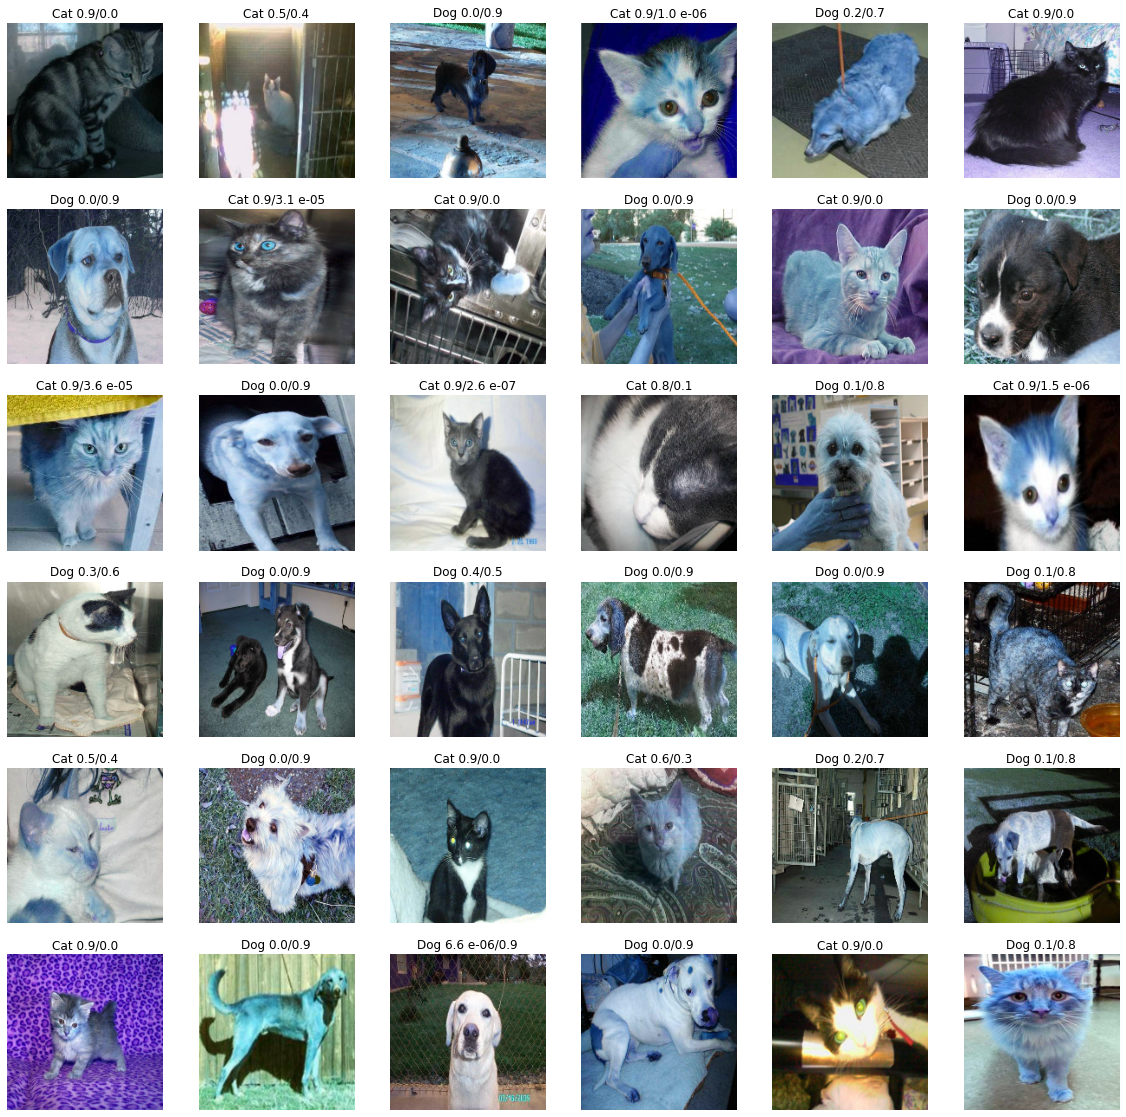

In [ ]:
plt.figure(figsize=(20,20))
for n, i in enumerate(list(np.random.randint(0, len(X_test),36))):
  plt.subplot(6,6,n+1)
  plt.imshow(array_to_img(X_test[i]))
  plt.axis('off')
  tcat= str(y_result[i][0])[:3]
  if "e" in str(y_result[i][0]):
    tcat +=" "+str(y_result[i][0])[-4:]

  tdog= str(y_result[i][1])[:3]
  if "e" in str(y_result[i][1]):
    tdog+=" "+str(y_result[i][1])[-4:]

  plt.title(get_code(np.argmax(y_result[i])) + " " + tcat + "/" + tdog)